In [4]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from classification_workflow import *
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import seaborn as sns

In [7]:
farm = pd.read_csv("farm_data_train.csv")
dict_models = {'KNeighborsClassifier': {
        'model': KNeighborsClassifier(),
        'param_grid': {
            'n_neighbors': [3, 5, 7, 9, 11, 12, 14, 16, 18, 20],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]
        }
    },
}

Going through each model defined in the dictionnary...:   0%|          | 0/1 [00:00<?, ?it/s]

Fitting 10 folds for each of 40 candidates, totalling 400 fits


c:\Users\naim\Desktop\Binary-classification\classification_workflow.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, pd.DataFrame([new_row])], ignore_index=True)


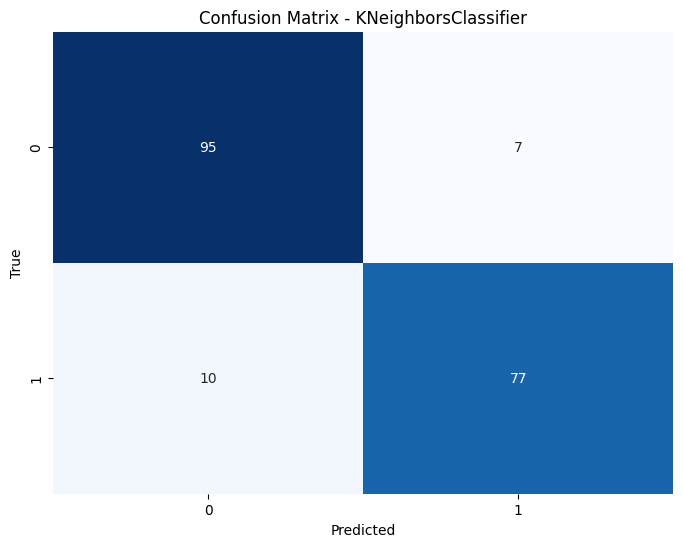

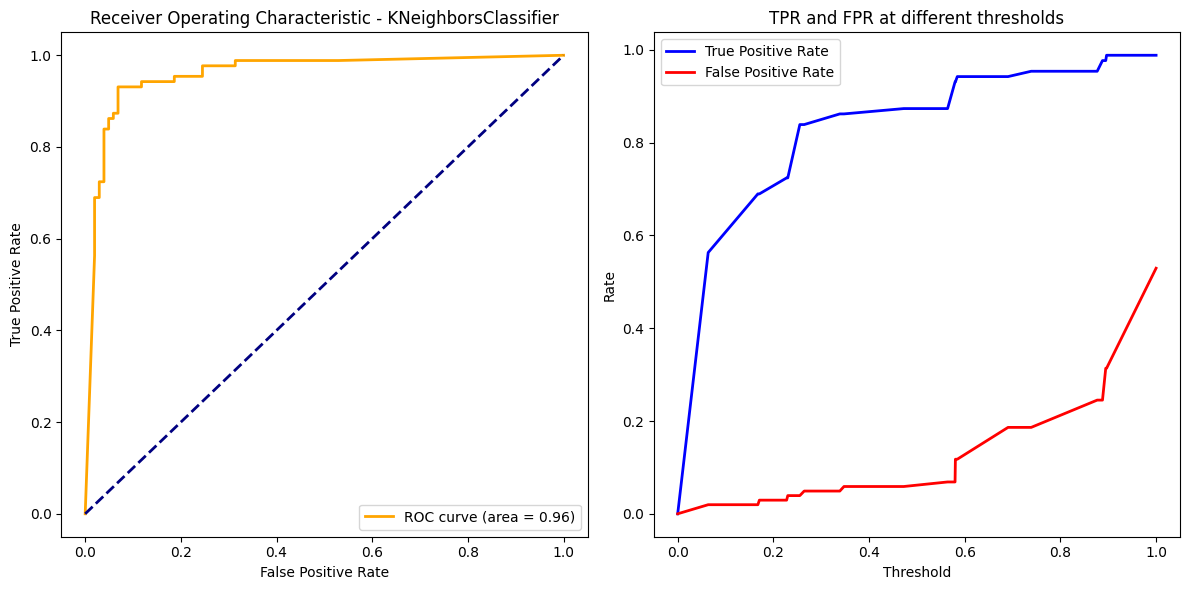

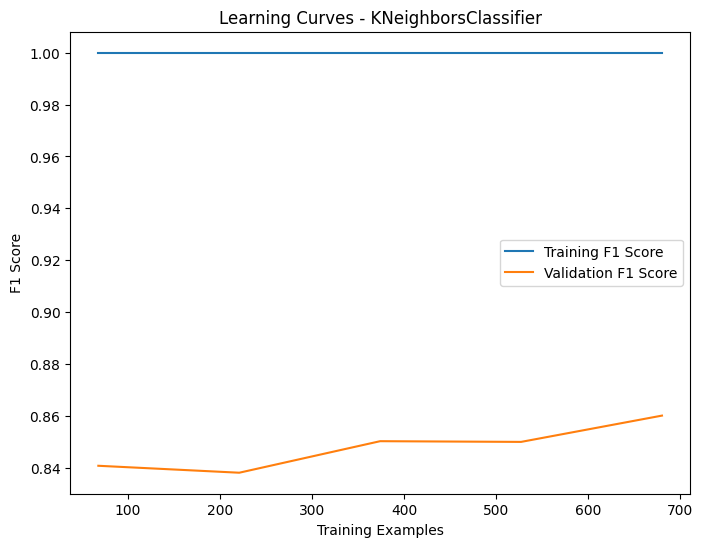

Going through each model defined in the dictionnary...: 100%|██████████| 1/1 [00:05<00:00,  5.80s/it]

Model: KNeighborsClassifier
Accuracy: 0.91005291005291
Precision: 0.9166666666666666
Recall: 0.8850574712643678
ROC-AUC: 0.9592066711742169


Pour la base test le score est: 0.8609271523178808


In [8]:
X = farm.drop(['DIFF'],axis=1) # 'R17','R32', R14, R2
y = farm['DIFF'] #Target
from sklearn.model_selection import train_test_split
import random
#random.seed(0)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=200)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=10) # avant 40 10 90%, 10 10 200  91%, 
display_results(dict_models, X_train, y_train, X_test, y_test, cv, 'f1 scoring on farm data(%)')
